In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Homework:

1)Given the dataframe attached "df3.csv", which columns contributed to creating the column "f"?

2)Plot the function y = 1/x between -10 and 10 

3)Recreate the following heatmaps:

<img src="image/Screenshot%202025-02-16%20alle%2020.07.31.png" alt="Drawing" style="width: 200px;"/>,
<img src="image/Screenshot%202025-02-16%20alle%2020.08.12.png" alt="Drawing" style="width: 200px;"/>,
<img src="image/Screenshot%202025-02-16%20alle%2021.54.51.png" alt="Drawing" style="width: 200px;"/>

# esercizio 1
Given the dataframe attached "df3.csv", which columns contributed to creating the column "f"?

In [88]:
# importo il dataframe e inizio a studiarlo un pò
df3 = pd.read_csv('data/df3.csv')

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   a           10000 non-null  float64
 2   b           10000 non-null  float64
 3   c           10000 non-null  float64
 4   d           10000 non-null  int64  
 5   x           10000 non-null  float64
 6   y           10000 non-null  float64
 7   z           10000 non-null  int64  
 8   h           10000 non-null  int64  
 9   g           10000 non-null  float64
 10  f           10000 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 859.5 KB


In [32]:
df3.head()

,Unnamed: 0,a,b,c,d,x,y,z,h,g,f
0,0,19.087423,-45.948735,45.727892,0,-1.685862,-44.262872,0,0,47.413754,45.263782
1,1,20.487493,-35.777837,49.552648,1,-1.506121,-34.271716,0,0,51.058770,544.311461
2,2,18.690196,-8.861605,48.903702,0,0.052330,-8.913935,0,0,48.851372,8.152672
3,3,19.429664,124.437220,48.357539,1,-0.640684,125.077904,0,0,48.998223,365.286478
4,4,20.909506,113.067077,49.989816,0,0.140450,112.926626,0,0,49.849366,-112.405410


In [48]:
df3['f'].describe()

count    10000.000000
mean       241.631775
std        269.395359
min       -368.620901
25%         -9.235237
50%        245.476066
75%        491.500945
max        857.753122
Name: f, dtype: float64

In [89]:
# vedo la correlazione con f delle altre colonne
df3.corr()["f"].sort_values(ascending=False)

f             1.000000
d             0.928932
g             0.030053
c             0.019905
x            -0.002183
a            -0.006081
Unnamed: 0   -0.007615
h            -0.008912
y            -0.370916
b            -0.370958
z                  NaN
Name: f, dtype: float64

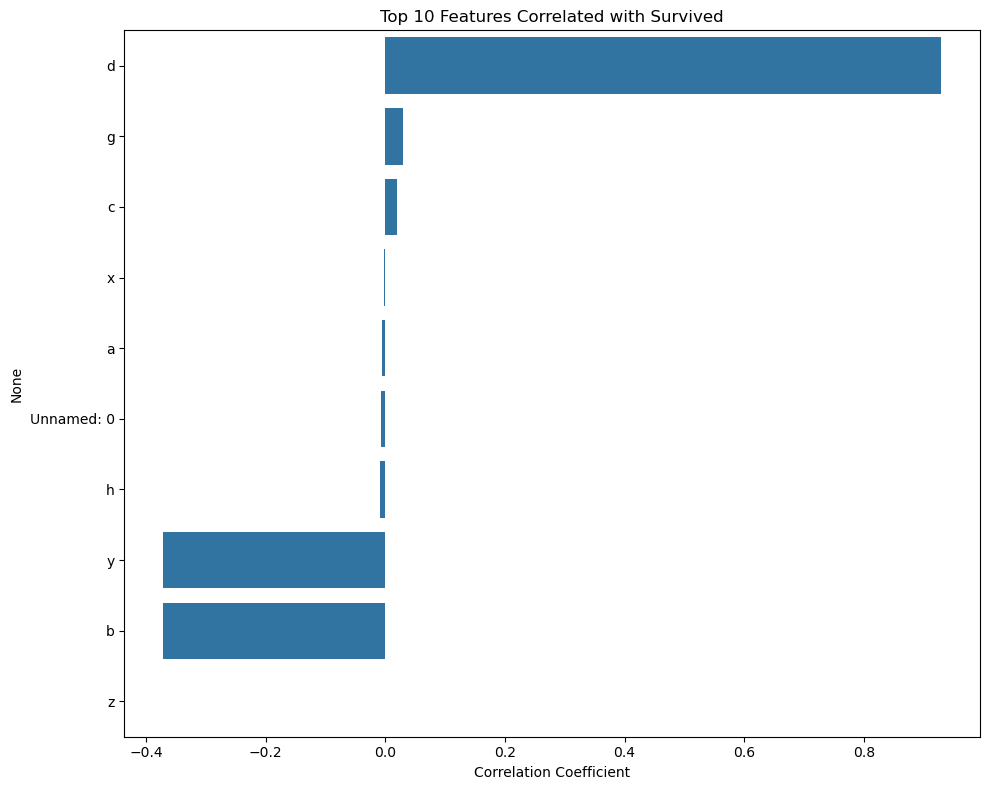

f               1.000 (Strong)
d               0.929 (Strong)
g             0.030 (Moderate)
c                 0.020 (Weak)
x                -0.002 (Weak)
a                -0.006 (Weak)
Unnamed: 0       -0.008 (Weak)
h                -0.009 (Weak)
y              -0.371 (Strong)
b              -0.371 (Strong)
Name: f, dtype: object

In [52]:
# seleziono le colonne solo numeriche escludendo i dati categorici
numeric_db = df3.select_dtypes(include = ['int64', 'float64'])
# calcola la correlzione tra ogni variabile numerica e suurvived e ordina i valori in ordine decrescente
correlation = numeric_db.corr()['f'].sort_values(ascending = False)


plt.figure(figsize = (10,8))
top_features = correlation[1:] # Esclude 'Survived' stesso
sns.barplot(x = top_features.values, y = top_features.index)
plt.title('Top 10 Features Correlated with Survived')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.shobw()

correlation.apply(lambda x: f"{x:.3f} ({'Strong' if abs(x) > 0.3 else 'Moderate' if abs(x) > 0.02 else 'Weak'})").head(10)

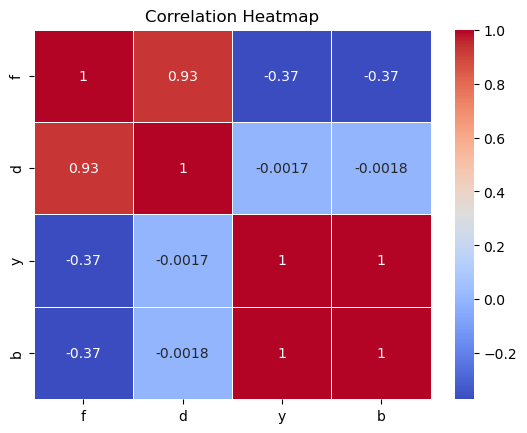

In [54]:
cols = ['f','d','y','b']
corr = df3[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Le tre feature che più contribuiscono al target 'f', ovvero "d,y,b".**
Noto che y e b hanno correlazione 1.

In [94]:
df3[['b', 'y']].value_counts()

b            y          
-349.948177  -350.306688    1
 52.524255    51.032153     1
 52.336739    53.761916     1
 52.362901    52.786782     1
 52.372191    52.674167     1
                           ..
-33.294598   -31.978773     1
-33.294488   -32.126985     1
-33.188439   -33.640274     1
-33.174196   -34.289095     1
 369.157557   369.721812    1
Length: 10000, dtype: int64

"b" e "y" on sono identiche ma molto simili... potrebbero essere degli arrotondamenti diversi dalla stessa operazione?

In [97]:
# Verifico se le differenze sono trascurabili.
import numpy as np

np.allclose(df3['b'], df3['y'], rtol=1e-03, atol=1e-03)

False

In [96]:
df3['diff'] = df3['b'] - df3['y']
df3['diff'].describe()

count    10000.000000
mean        -0.002568
std          0.988702
min         -3.891829
25%         -0.664353
50%         -0.003790
75%          0.663694
max          3.504197
Name: diff, dtype: float64

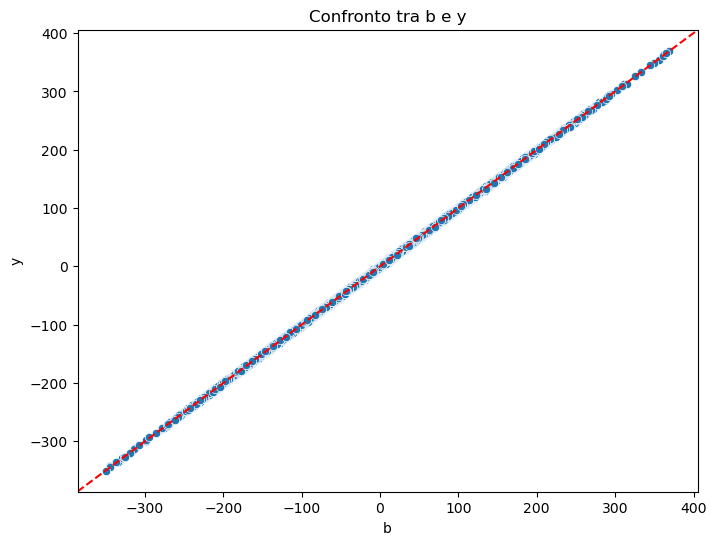

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df3['b'], y=df3['y'])
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Linea perfetta x = y
plt.title("Confronto tra b e y")
plt.xlabel("b")
plt.ylabel("y")
plt.show()

Continuo a non capire se b e y sono la stessa cosa....

## Procedo con l'ipotesi del modello di regressione per vedere le feature più importanti

Suppongo che l'esercizio introduca l'idea di predire un target value attraverso le feature.

Provo ad applicare i concetti studianti nel corso parallelo che sto seguendo.
Il mio target è un numero float che può essere sia negativo che positivo, quindi è un problema di **Regressione**.
Installo scikit-learn e uso RandomForestRegressor

In [62]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 1.5 MB/s eta 0:00:001.4 MB/s eta 0:00:01m
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# divido i dati in label (quindi droppo il target")
X = df3.drop(columns=["f"])
# y diventa il target
y = df3["f"]
# Faccio la divisione dei dati in testing e training, uso la solita percentuale dello 0.2, e impost un random state, 
# per poter condividere le osservazioni

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Istanzio il modello
model = RandomForestRegressor()
# faccio il fit del modello con i dati di training
model.fit(X_train, y_train)

# calcolo l'importanza delle feature. E creo una serie con indice i nomi delle colonne e il corrispettivo valore.
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

d             8.623231e-01
y             1.052614e-01
b             3.179084e-02
g             5.841659e-04
c             1.781439e-05
a             7.705864e-06
Unnamed: 0    7.470132e-06
x             6.680958e-06
h             8.896069e-07
z             0.000000e+00
dtype: float64


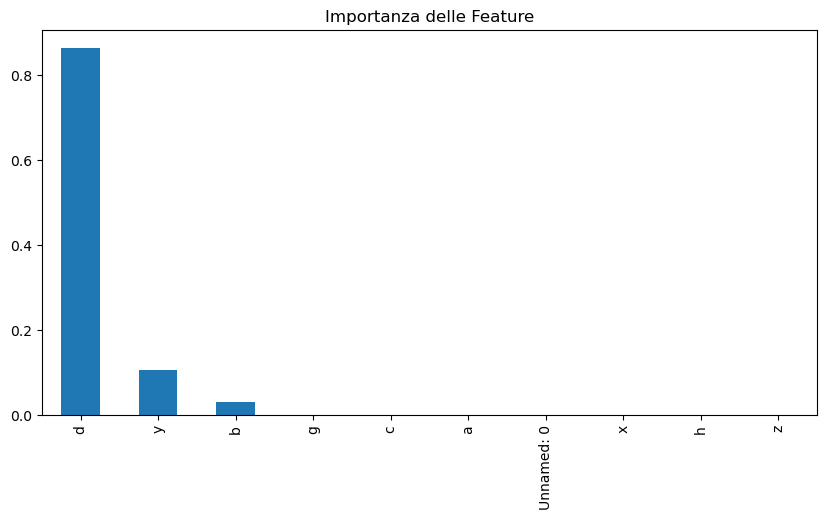

In [65]:
# lO mostro graficametne
import matplotlib.pyplot as plt

feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Importanza delle Feature")
plt.show()

Quindi sia con la correlazione base che con l'uso del modello di regressione confermo le tre feature che più contribuiscono al target 'f',
ovvero **"d,y,b"**

## Noto che **"d"** quello con il valore più alto di correlazione sembra un valore categorico in quanto è popolato solo da 0 e 1.

In [75]:
df3["d"].value_counts()

0    5000
1    5000
Name: d, dtype: int64

Se la colonna d ha lo stesso numero di valori per le due categorie è bilanciata rispetto a se stessa.

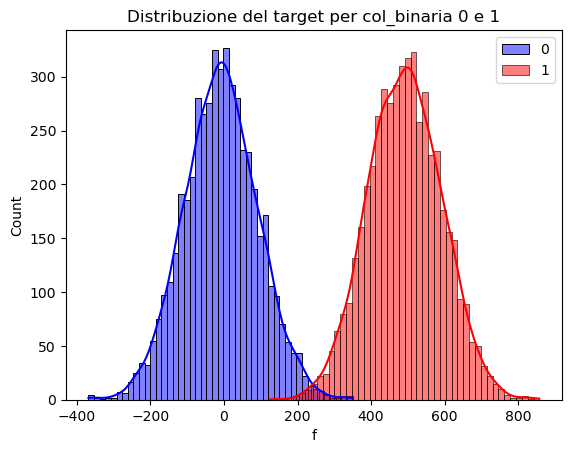

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df3[df3['d'] == 0]['f'], color='blue', label='0', kde=True)
sns.histplot(df3[df3['d'] == 1]['f'], color='red', label='1', kde=True)
plt.legend()
plt.title("Distribuzione del target per col_binaria 0 e 1")
plt.show()


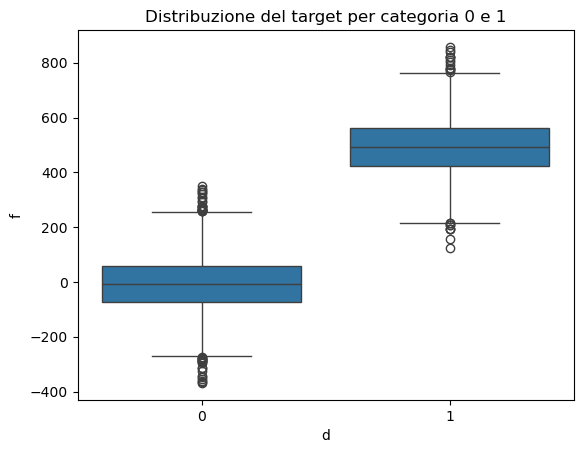

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df3['d'], y=df3['f'])
plt.title("Distribuzione del target per categoria 0 e 1")
plt.show()


I box plot sembrano molto simili ma traslati. Quindi D shifta il valore di f?

In [85]:
from scipy.stats import ttest_ind

group_0 = df3[df3['d'] == 0]['f']
group_1 = df3[df3['d'] == 1]['f']

t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -250.86778968900265, P-value: 0.0


Il test t ha dato un valore T-statistic molto grande in valore assoluto e un p-value pari a 0.0 (o comunque estremamente vicino a zero). Questo significa che la differenza di media tra i due gruppi $d=0$ e $d=1$ è statisticamente significativa.

🧐 Interpretazione
**La variabile binaria  d ha un impatto fortissimo sul target f.**

Il fatto che il **p-value sia zero implica che non è dovuto al caso**.
La differenza tra i due gruppi è molto netta e rilevante.

La distribuzione di f è semplicemente traslata verticalmente tra i due gruppi.
Questo indica che d agisce come un fattore di shift (spostamento).
Il valore negativo di T-statistic (-250) suggerisce che il gruppo $d=1$ abbia un valore medio di f molto più alto o più basso rispetto a $d=0$.

A questo punto calcolo le medie dei due gruppi:

In [87]:
mean_0 = df3[df3['d'] == 0]['f'].mean()
mean_1 = df3[df3['d'] == 1]['f'].mean()

print(f"Media di f per d=0: {mean_0}")
print(f"Media di f per d=1: {mean_1}")
print(f"Differenza di media: {mean_1 - mean_0}")
print(f"Media per d=1 > media d=2, quindi d=1 ha valori più grandi f")


Media di f per d=0: -8.605674959963514
Media di f per d=1: 491.8692253706662
Differenza di media: 500.4749003306297
Media per d=1 > media d=2, quindi d=1 ha valori più grandi f


# Quindi d influenza tantissimo, potrebbe essere un Sì/no a qualcosa oppure potrebbe derivare a sua volta da altro?
Vediamo che succede cercando della correlazioni per d

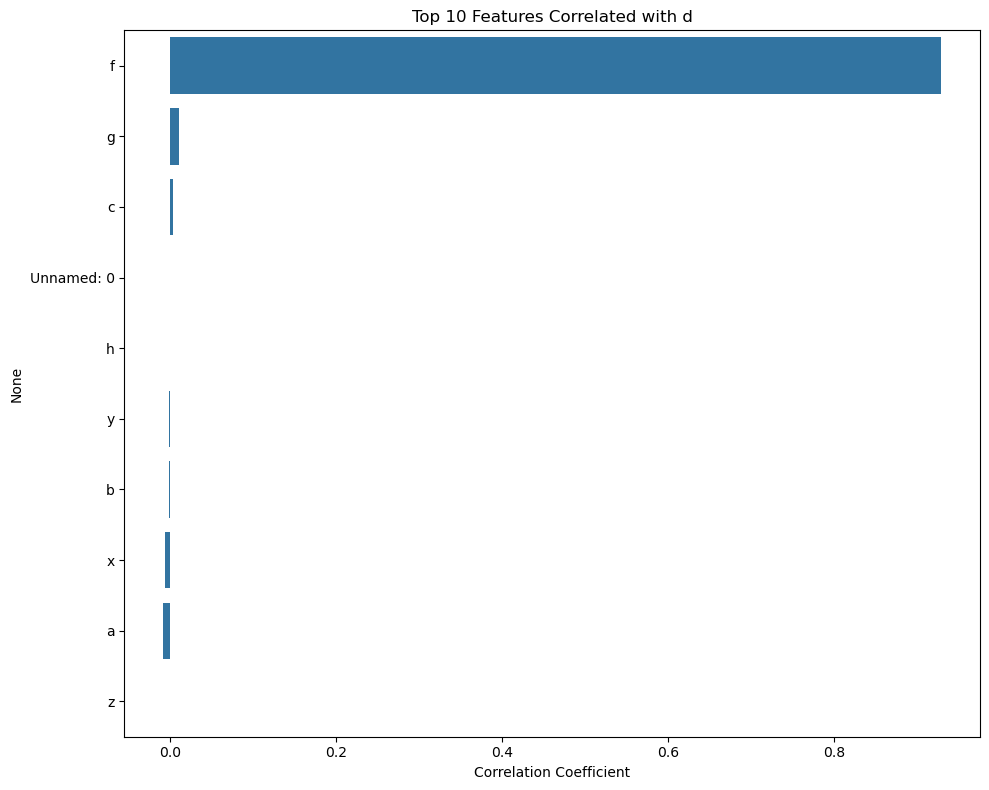

d             1.000 (Strong)
f             0.929 (Strong)
g               0.011 (Weak)
c               0.003 (Weak)
Unnamed: 0      0.000 (Weak)
h               0.000 (Weak)
y              -0.002 (Weak)
b              -0.002 (Weak)
x              -0.006 (Weak)
a              -0.008 (Weak)
Name: d, dtype: object

In [92]:
# seleziono le colonne solo numeriche escludendo i dati categorici
numeric_db = df3.select_dtypes(include = ['int64', 'float64'])
# calcola la correlzione tra ogni variabile numerica e suurvived e ordina i valori in ordine decrescente
correlation = numeric_db.corr()['d'].sort_values(ascending = False)


plt.figure(figsize = (10,8))
top_features = correlation[1:] # Esclude 'Survived' stesso
sns.barplot(x = top_features.values, y = top_features.index)
plt.title('Top 10 Features Correlated with d')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

correlation.apply(lambda x: f"{x:.3f} ({'Strong' if abs(x) > 0.3 else 'Moderate' if abs(x) > 0.02 else 'Weak'})").head(10)

Non sembrerebbe avere una correlazione particolare con altre feature. 
Da approfondire durante la lezione


# esercizio 2
Plot the function y = 1/x between -10 and 10 

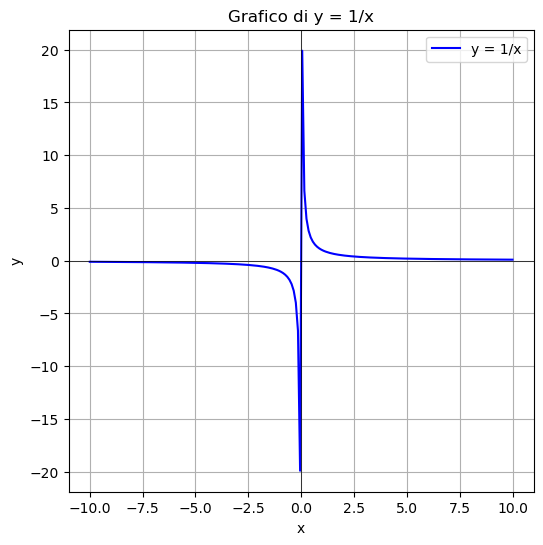

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Definisci l'intervallo per x
x = np.linspace(-10, 10, 200)

# Evita la divisione per zero
x = x[x != 0]

# Definisci la funzione y = 1/x
y = 1 / x

# Crea il grafico
plt.figure(figsize=(6, 6))
plt.plot(x, y, label="y = 1/x", color="b")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Grafico di y = 1/x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# esercizio 3
<img src="image/Screenshot%202025-02-16%20alle%2020.07.31.png" alt="Drawing" style="width: 200px;"/>,
<img src="image/Screenshot%202025-02-16%20alle%2020.08.12.png" alt="Drawing" style="width: 200px;"/>,
<img src="image/Screenshot%202025-02-16%20alle%2021.54.51.png" alt="Drawing" style="width: 200px;"/>

Come calcolo di volta in volta la formula per **z**?

Posso, probabilmente, controllare se in qualche modo sono presenti delle **simmetrie** o sull'asse x o y.
In tutte le immagini vedo delle simmetrie:
- Se ci sono significa che i contiene dei valori elevati al quadrato o dei prodotti. es $x^2, y^2 , xy$
- Nella prima immagine noto una simmetria in diagonale:

La funzione  $Z=X⋅Y$ crea una simmetria lungo la diagonale 
Quando $x$ e $𝑦$ hanno lo stesso segno:
* Il prodotto è positivo → colori più caldi nella heatmap.
* Quando $x$ e $𝑦$ hanno segni oppsti: Il prodotto è negativo → colori più freddi nella heatmap.

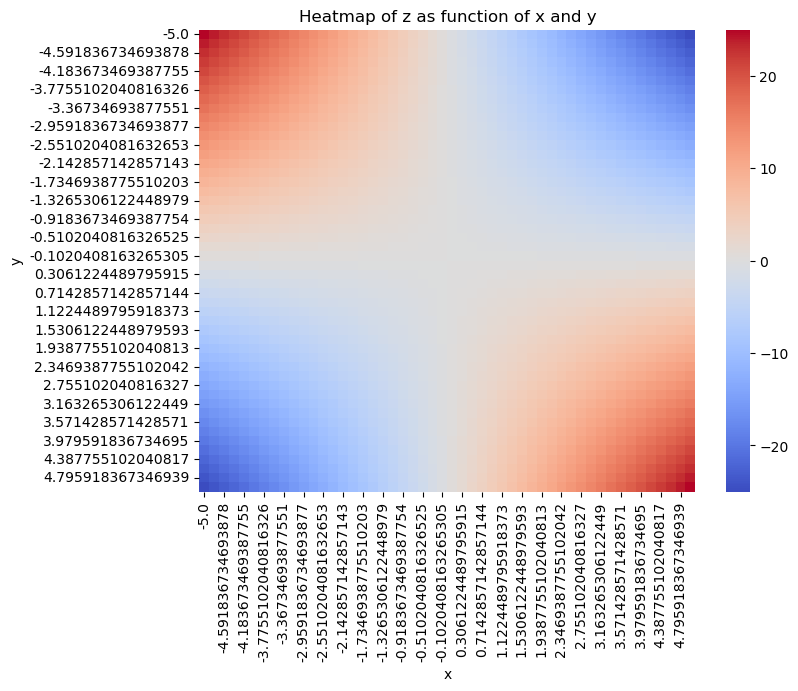

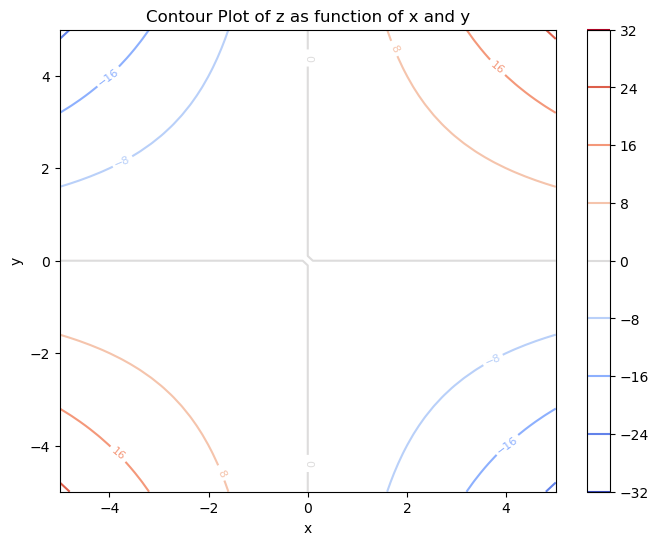

In [39]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X*Y  # Example function

# Convert to DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

La heatmap si gerera nel punto (0,0).

Il valore con cui calcolo $Z = X^2 + Y^2$, indica la distanza quadrata dall'orgine.
* Questa funzione definisce cerchi concentrici centrati nell'origine.
* Tutti i punti equidistanti dal centro hanno lo stesso valore di $Z$.
  
* Centro $(0, 0)$ → Valore minimo (spesso il colore più freddo).
* Simmetria radiale → Valori crescono in modo uguale in tutte le direzioni.
* Cerchi concentrici → Ogni cerchio rappresenta punti con lo stesso valore di $Z$.

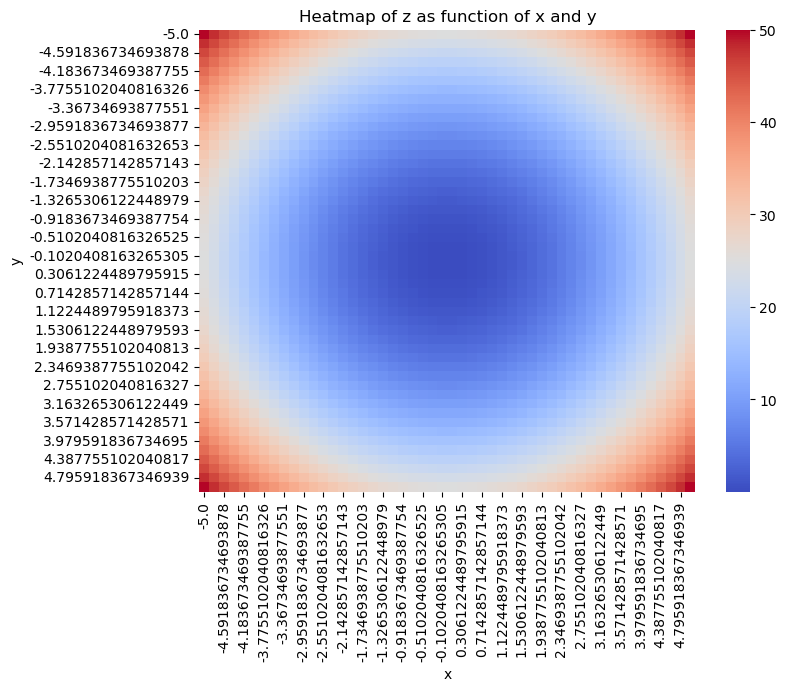

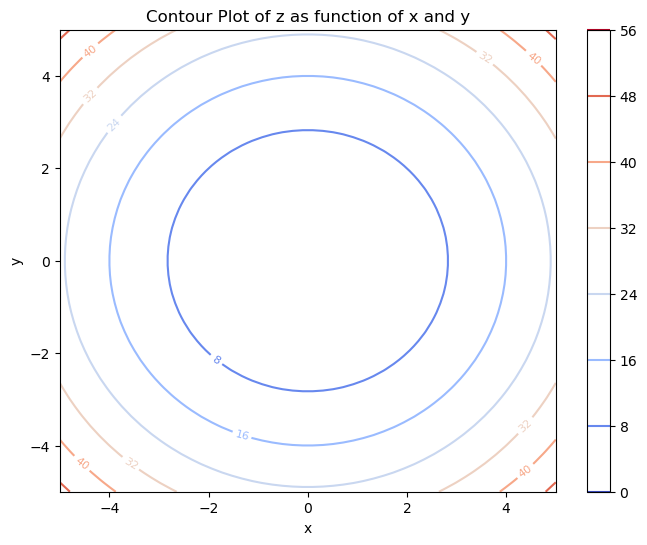

In [41]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2+Y**2  # Example function

# Convert to DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In questo caso abbiamo una sorta di U, **pattern parabolico inclinato**.

È verticalmente simmetrica rispetto a $X=0$.

Il termine $𝑋^2$ è sempre positivo e simmetrico rispetto a $𝑥 =0$, in quanto $x^2$ è uguale sia per i valori positivi che negativi

Ogni punto $(x,y)$ e il suo opposto $(-x,y)$ avrò ki stessi valore di z.

Quindi $(+Y)$ cambia soli i valori lungo l'asse $y$ ma non rompe la simmetria di $X$, ne introduce l'inclinazione lineare, dove i valori di **Z crescono all'aumentare di Y**

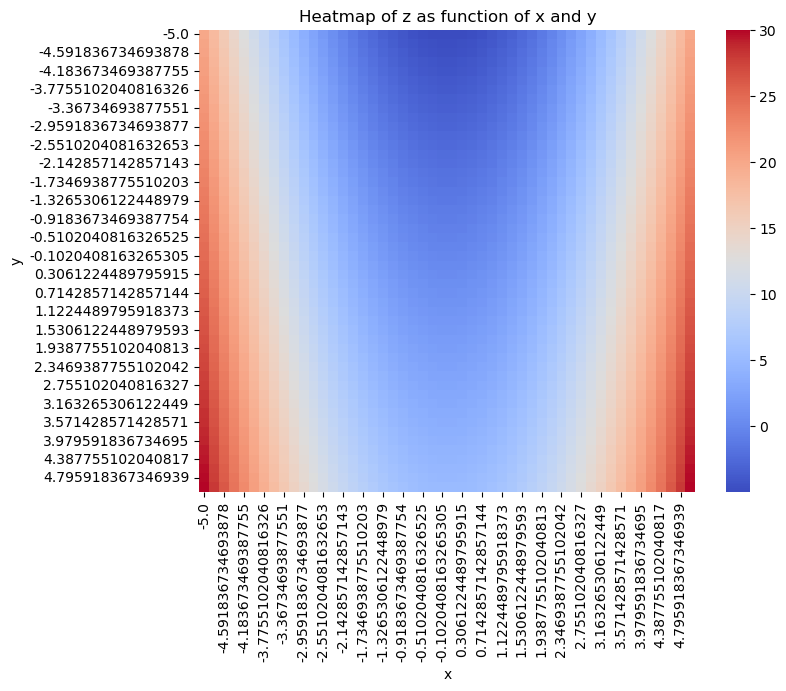

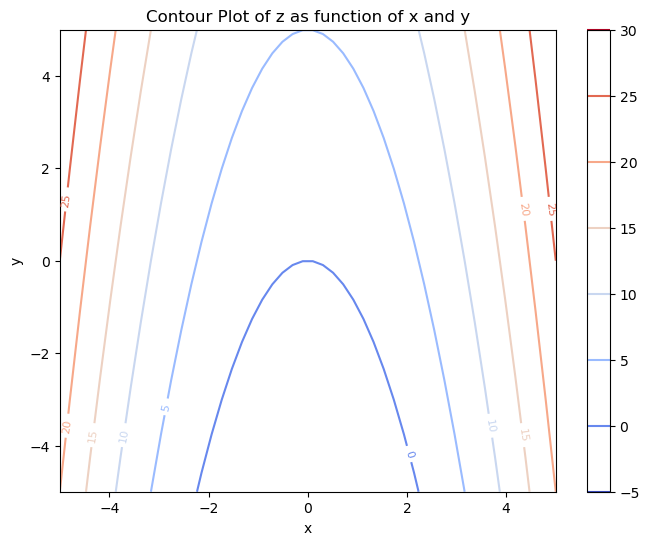

In [69]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + Y  # Example function

# Convert to DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()